線形SVMの利用

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample08_2_1.csv')

In [5]:
# データをtype別に分割する
t1 = df[df.type == 1]
t2 = df[df.type == 2]

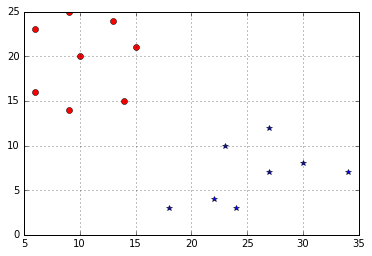

In [6]:
#分割した各点を描画
plt.plot(t1['x'],t1['y'],'ro')
plt.plot(t2['x'],t2['y'],'b*')
plt.grid()

In [9]:
# 基準値（ここでいうと１、２）でグループに分けて赤丸か青い星で表示することができる

In [11]:
from sklearn import svm

In [20]:
clf = svm.LinearSVC()
clf.fit(df[['x','y']],df['type'])

# x,y　座標の組みに対するtype学習させます。　　第１引数にx,yの組、第２引数にtypeの配列を指定します
# sampleデータは、「x,t,type」のデータが入っている
# clfは、分類の略

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [23]:
clf.predict([[10,5],[10,10],[15,5]])

# 学習が行えたらpredictメソッドにより分類結果を表示することができます
# このfitで学習、predictで未知データに適応はscikit-learnの多くのアルゴリズムに共通している

# 下記の結果は、１つ目が２、２つ目が１、３つ目が２に分類された
#  xとyの値に対して学習した内容を元に（予測され）分類された

array([2, 1, 2])

### 第２項線形SVMの可視化

In [30]:
# SVMに学習させて得られた境界面を実際に描画してみる。それを線形分離という

In [26]:
clf.coef_
# 係数を確認してみる
# ２つあるので２次元配列

array([[ 0.12066782, -0.17809801]])

In [31]:
clf.intercept_
# 切片を確認してみる
# １つなので１次元配列

array([-0.00487582])

In [32]:
# 線形回帰分析とは異なり、coef_は２次元配列、intercept_は１次元配列になっている
# coef_が２次元配列になっているので、y=ax+bではなく、y= ax+by+c=0 とする。（一般的な直線の方程式で考える）
# a = 0.12066782、 b =-0.17809801、c=-0.00487582　とすれば良い
#これをグラフにかけるように計算すると
#（ax+by+c=0 ）は、　　y = (-ax-c)　/b　となる

In [33]:
import numpy as np

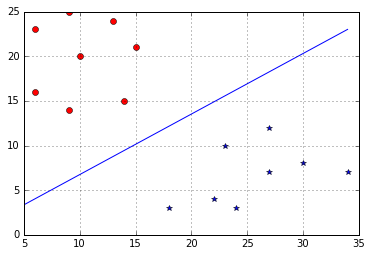

In [42]:
#aとbの２つの係数を取り出す

a = clf.coef_[0][0]
b = clf.coef_[0][1]

#　切片cを取り出す
c = clf.intercept_[0]

# 描画するX座標を生成（表示するグラフの範囲を自分で決めて指定）
x = np.arange(5,35)

# 係数に対する直線を描画
# xは先ほど決めた値を代入。計算式はy = (-ax-c)　/b　となる
plt.plot(x,(-a*x-c)/b)

# 赤丸や青い星がお描画させなかったので、以下の内容を入力したら描画された
plt.plot(t1['x'],t1['y'],'ro')
plt.plot(t2['x'],t2['y'],'b*')
plt.grid()


### 第３項 非線形SVMの利用

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
df = pd.read_csv('sample08_2_3.csv')

In [75]:
# データをtype別に分割するぞ

t1 = df[df.type == 1]
t2 = df[df.type == 2]

(0, 10)

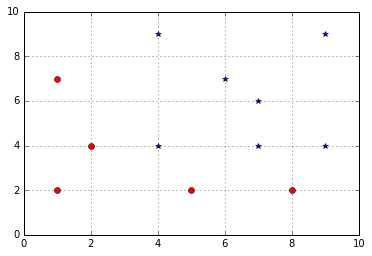

In [76]:
# 分割した各点を描画してみる

plt.plot(t1['x'],t1['y'],'ro')
plt.plot(t2['x'],t2['y'],'b*')

plt.grid()
plt.xlim(0,10)
plt.ylim(0,10)